# Setup

In [1]:
!pip install fredapi 
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
from kaggle_secrets import UserSecretsClient

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


env = UserSecretsClient()
fred_key = env.get_secret('FRED-API')


# 1. Create Fred Object

In [3]:
# Fred
from fredapi import Fred
fred = Fred(api_key=fred_key)

#Search Economic data
sa_economic_indicators = fred.search("south africa")

#Display concise summary of result
sa_economic_indicators.head()


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
ZAFCPIALLMINMEI,ZAFCPIALLMINMEI,2025-01-12,2025-01-12,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2024-11-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-12-16 13:56:04-06:00,37,OECD Data Filters: REF_AREA: ZAF MEASURE: CPI...
CPALTT01ZAM659N,CPALTT01ZAM659N,2025-01-12,2025-01-12,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1958-01-01,2024-11-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2024-12-16 13:56:05-06:00,14,OECD Data Filters: REF_AREA: ZAF MEASURE: CPI...
ZAFCPIALLQINMEI,ZAFCPIALLQINMEI,2025-01-12,2025-01-12,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1957-01-01,2024-07-01,Quarterly,Q,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2024-11-15 13:55:08-06:00,9,OECD Data Filters: REF_AREA: ZAF MEASURE: CPI...
CPALTT01ZAM657N,CPALTT01ZAM657N,2025-01-12,2025-01-12,Consumer Price Index: All Items: Total for Sou...,1957-02-01,2024-02-01,Monthly,M,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2024-04-10 11:29:19-05:00,7,OECD Descriptor ID: CPALTT01 OECD unit ID: PC ...
CPALTT01ZAQ657N,CPALTT01ZAQ657N,2025-01-12,2025-01-12,Consumer Price Index: All Items: Total for Sou...,1957-04-01,2023-10-01,Quarterly,Q,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2024-04-10 11:32:02-05:00,2,OECD Descriptor ID: CPALTT01 OECD unit ID: PC ...


In [4]:
#create economic indicatos objects

unemployment_rate = fred.get_series('LRUN64TTZAA156S', observation_start='2000-01-01', observation_end='2019-12-31')

# Monthly series
construction_growth = fred.get_series('ZAFPRCNTO01MLSAM', observation_start='2000-01-01', observation_end='2019-12-31')
# Yearly series
inflation = fred.get_series('FPCPITOTLZGZAF', observation_start='2000-01-01', observation_end='2019-12-31')
real_gdp = fred.get_series('ZAFNGDPRPCPCPPPT', observation_start='2000-01-01', observation_end='2019-12-31')
gdp_nominal = fred.get_series('MKTGDPZAA646NWDB', observation_start='2000-01-01', observation_end='2019-12-31')



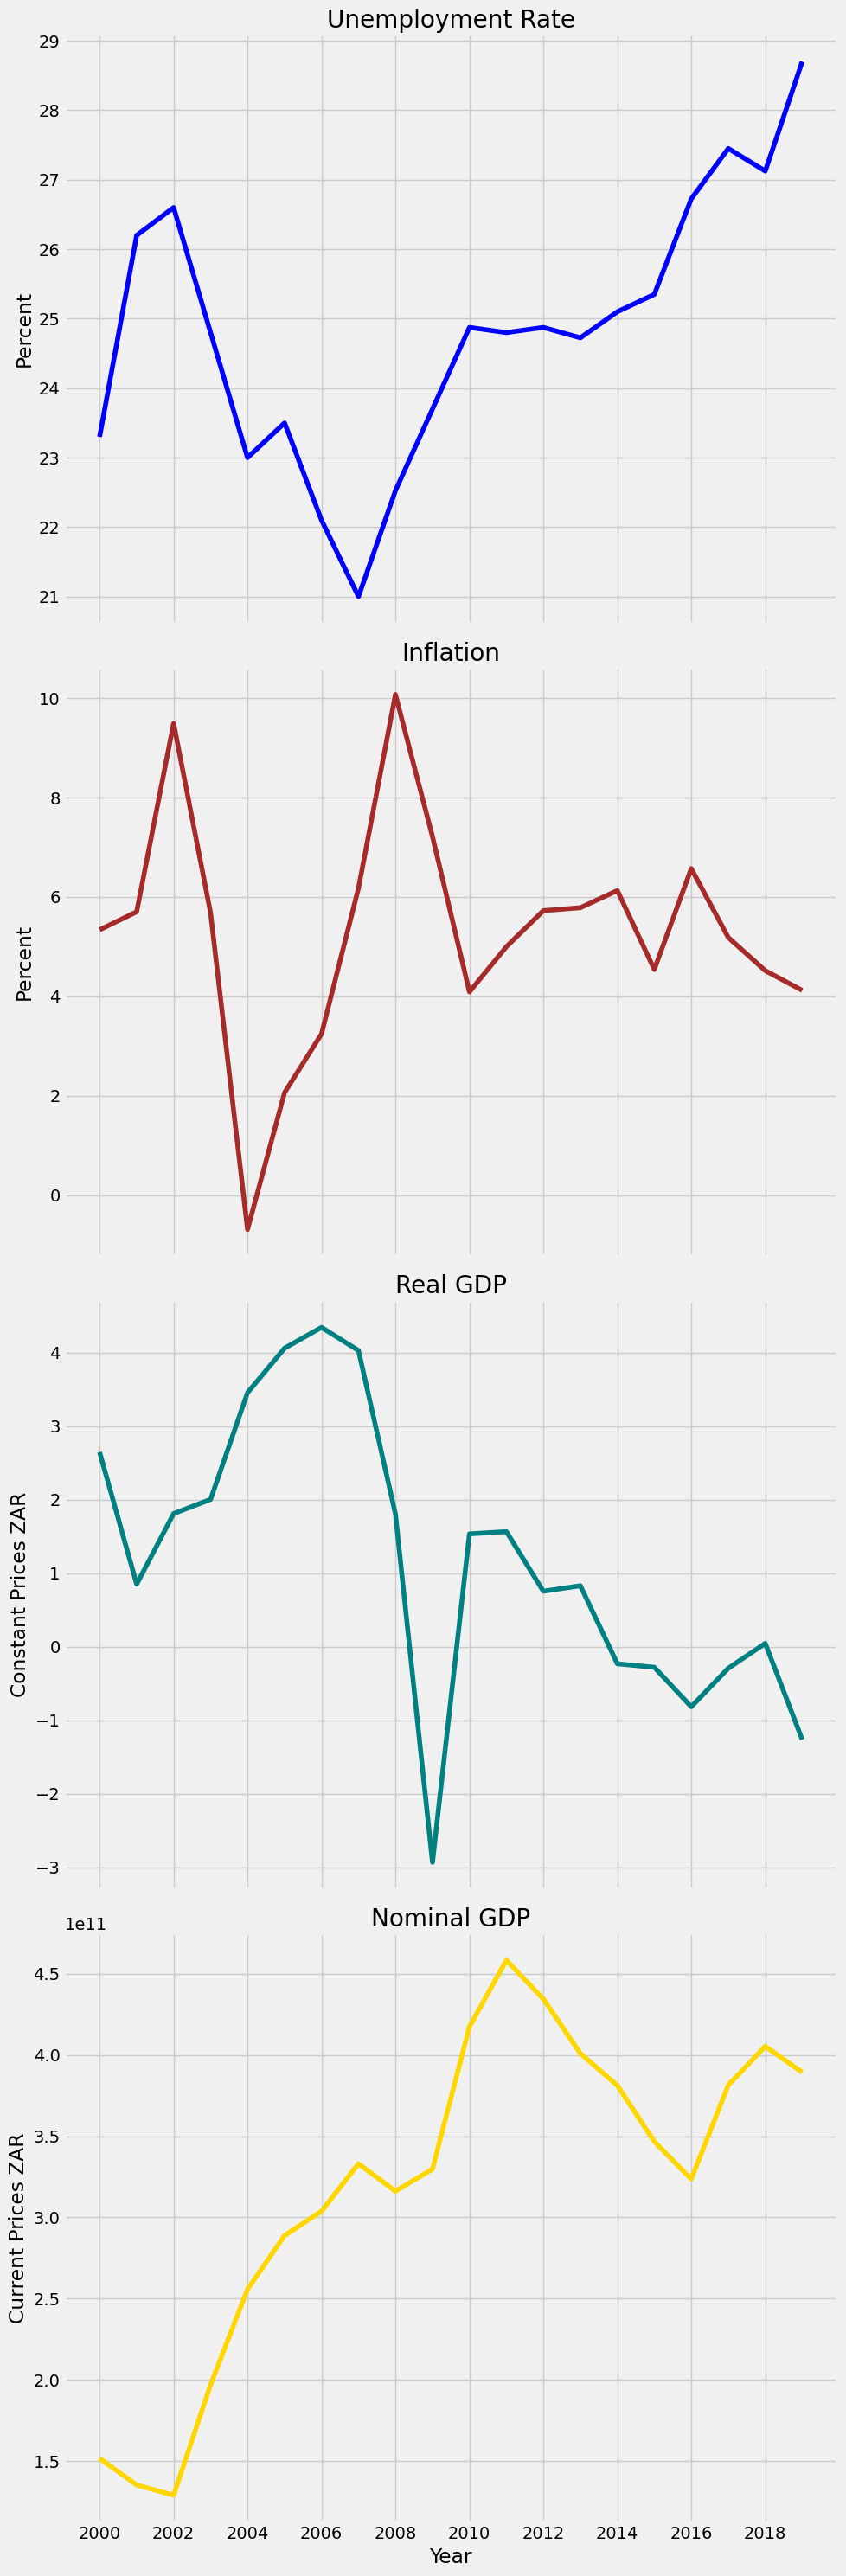

In [5]:
# Display series 

fig, axes = plt.subplots(4, 1, figsize=(10, 30), sharex=True)

# Plot each series
axes[0].plot(unemployment_rate.index, unemployment_rate, color='blue')
axes[0].set_title('Unemployment Rate')
axes[0].set_ylabel('Percent')

#axes[1].plot(construction_growth.index, construction_growth, color='green')
#axes[1].set_title('Construction Growth (Monthly)')
#axes[1].set_ylabel('Growth Rate %')
#
#axes[2].plot(manufacturing_growth.index, manufacturing_growth, color='purple')
#axes[2].set_title('Manufacturing Growth (Monthly)')
#axes[2].set_ylabel('Growth Rate %')
#
#axes[3].plot(mining_growth.index, mining_growth, color='orange')
#axes[3].set_title('Mining Growth (Monthly)')
#axes[3].set_ylabel('Growth Rate %')
#
#axes[4].plot(interest_rate.index, interest_rate, color='red')
#axes[4].set_title('Interest Rate')
#axes[4].set_ylabel('Percent')

axes[1].plot(inflation.index, inflation, color='brown')
axes[1].set_title('Inflation')
axes[1].set_ylabel('Percent')

axes[2].plot(real_gdp.index, real_gdp, color='teal')
axes[2].set_title('Real GDP')
axes[2].set_ylabel('Constant Prices ZAR')

axes[3].plot(gdp_nominal.index, gdp_nominal, color='gold')
axes[3].set_title('Nominal GDP')
axes[3].set_ylabel('Current Prices ZAR')

# Add a shared X-label
plt.xlabel('Year')
plt.tight_layout()

# Display the plots
plt.show()


# Evaluating South Africa's Recovery

In [6]:
#import scikit-learn's model for prediction 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [7]:
# Prepare the data
# Fetch the quarterly unemployment rate series
unemployment = fred.get_series('LRUN64TTZAQ156S', observation_start=None, observation_end='2019-12-31')

# Converting and preparing the data
data = unemployment.reset_index()  
data.columns = ['Date', 'Unemployment']  
data['Year'] = data['Date'].dt.year + (data['Date'].dt.quarter - 1) / 4  

imputer = SimpleImputer(strategy="mean")
data['Unemployment'] = imputer.fit_transform(data[['Unemployment']])


# Different ML Models

## 1 - Linear Regression

Model Performance:
R² Score: 0.12
Mean Absolute Error: 1.62%


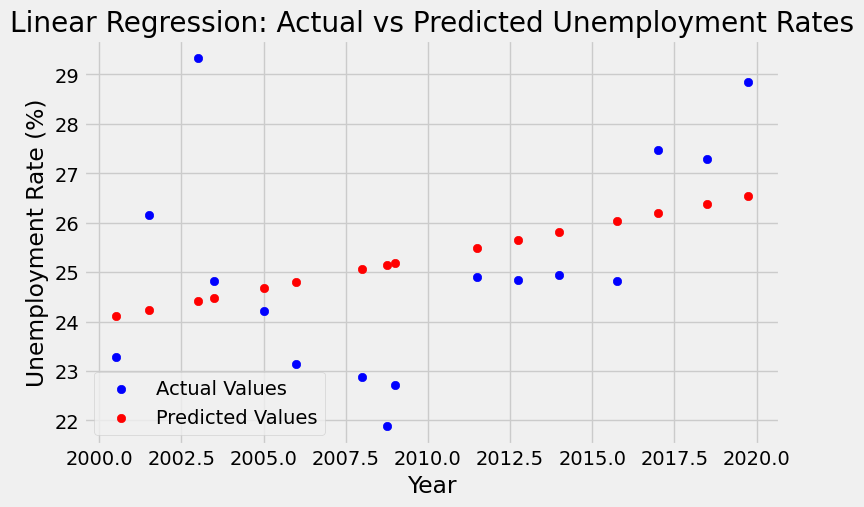

In [8]:

# Features (X) and target (y)
X = data[['Year']]  
y = data['Unemployment']  

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)  # R² score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

print(f"Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}%")

# Optionally, plot actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Actual Values", color="blue")
plt.scatter(X_test, y_pred, label="Predicted Values", color="red")
plt.title("Linear Regression: Actual vs Predicted Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

## 2 - MLP Regressor

MLPRegressor Performance:
R² Score: -19.81
Mean Absolute Error: 9.49%


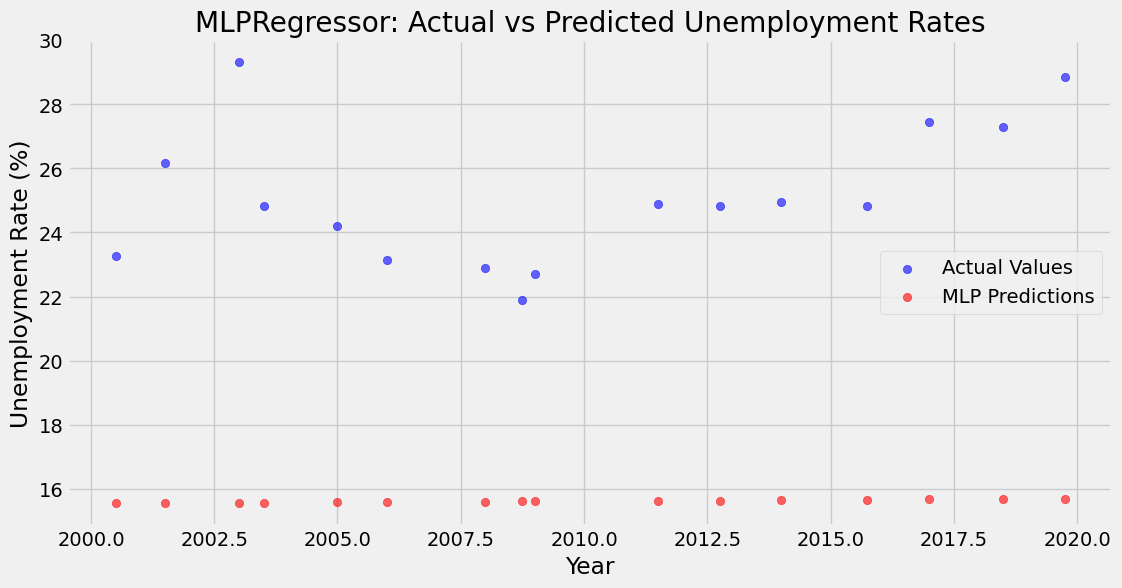

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer


# Re Fetch unemployment data 
unemployment = fred.get_series('LRUN64TTZAQ156S', observation_start='2020-04-01', observation_end='2020-04-01')

# Convert data to DataFrame
data = unemployment.reset_index()
data.columns = ['Date', 'Unemployment']
data['Year'] = data['Date'].dt.year + (data['Date'].dt.quarter - 1) / 4  # Fractional years



# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

print("MLPRegressor Performance:")
print(f"R² Score: {r2_mlp:.2f}")
print(f"Mean Absolute Error: {mae_mlp:.2f}%")


# Plot MLPRegressor predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual Values", color="blue", alpha=0.6)
plt.scatter(X_test, y_pred_mlp, label="MLP Predictions", color="red", alpha=0.6)
plt.title("MLPRegressor: Actual vs Predicted Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

## 3 -SVR


Support Vector Regression Performance:
R² Score: 0.59
Mean Absolute Error: 0.94%


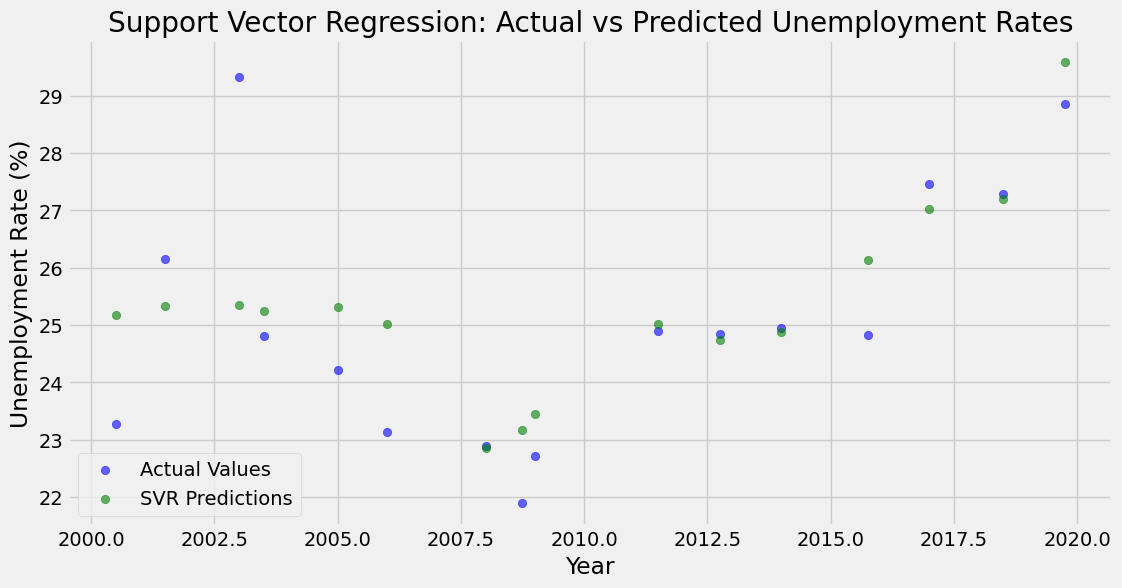

In [10]:
# Define and train Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("\nSupport Vector Regression Performance:")
print(f"R² Score: {r2_svr:.2f}")
print(f"Mean Absolute Error: {mae_svr:.2f}%")

# Plot SVR predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual Values", color="blue", alpha=0.6)
plt.scatter(X_test, y_pred_svr, label="SVR Predictions", color="green", alpha=0.6)
plt.title("Support Vector Regression: Actual vs Predicted Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

## 4 Linear Tree

In [11]:
!pip install linear-tree

Linear Tree Model Performance:
R² Score: 0.66
Mean Absolute Error: 0.83%


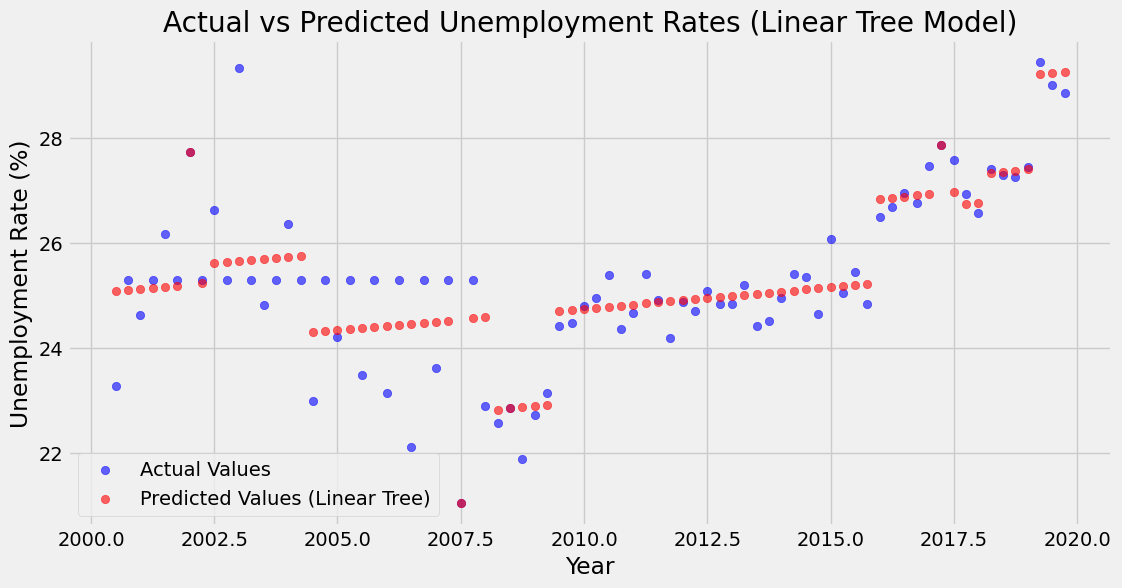

In [12]:
from lineartree import LinearBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Fetch unemployment data (quarterly, earliest to March 1, 2020)
unemployment = fred.get_series('LRUN64TTZAQ156S', observation_start=None, observation_end='2019-12-31')

# Convert data to DataFrame
data = unemployment.reset_index()
data.columns = ['Date', 'Unemployment']
data['Year'] = data['Date'].dt.year + (data['Date'].dt.quarter - 1) / 4  # Fractional years

# Handle NaN values using mean imputation
imputer = SimpleImputer(strategy="mean")
data['Unemployment'] = imputer.fit_transform(data[['Unemployment']])

# Features (X) and target (y)
X = data[['Year']]  # Fractional years as features
y = data['Unemployment']  # Unemployment rates as the target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Linear Tree model
linear_tree_model = LinearBoostRegressor(
    base_estimator=LinearRegression(),
    n_estimators=10,
    random_state=42
)

linear_tree_model.fit(X_train, y_train)

# Predict unemployment rates on the testing set
y_pred = linear_tree_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Linear Tree Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}%")

# Predict unemployment rates for the entire dataset for visualization
data['Predicted_Unemployment'] = linear_tree_model.predict(X)

# Plot actual vs predicted unemployment rates
plt.figure(figsize=(12, 6))
plt.scatter(data['Year'], data['Unemployment'], label="Actual Values", color="blue", alpha=0.6)
plt.scatter(data['Year'], data['Predicted_Unemployment'], label="Predicted Values (Linear Tree)", color="red", alpha=0.6)
plt.title("Actual vs Predicted Unemployment Rates (Linear Tree Model)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

## Linear Tree Performance in Unemployment Rate Prediction

Linear Tree  performed better than other models with an **R² Score**: 0.66 and **Mean Absolute Error (MAE)**: 0.83%

- **Difficulty of Predicting Unemployment Rate of South Africa**:
  - Other factors can impact unemployment rate. Social, Historical, and Political factors
  - Human factors and nuances tend to be unpredictable
  - **R² score** of 0.66 and **(MAE)** of 0.83% is sufficient for this analysis.

 ## Application of the Linear Tree Model
 
- The Linear Tree model will be used to forecast economic indicators under a hypothetical scenario where COVID-19 did not occur.

This is simple analysis to see how well the South African Economy has recovered from the disruption of the COVID-19 pandemic.


Processing Unemployment Rate


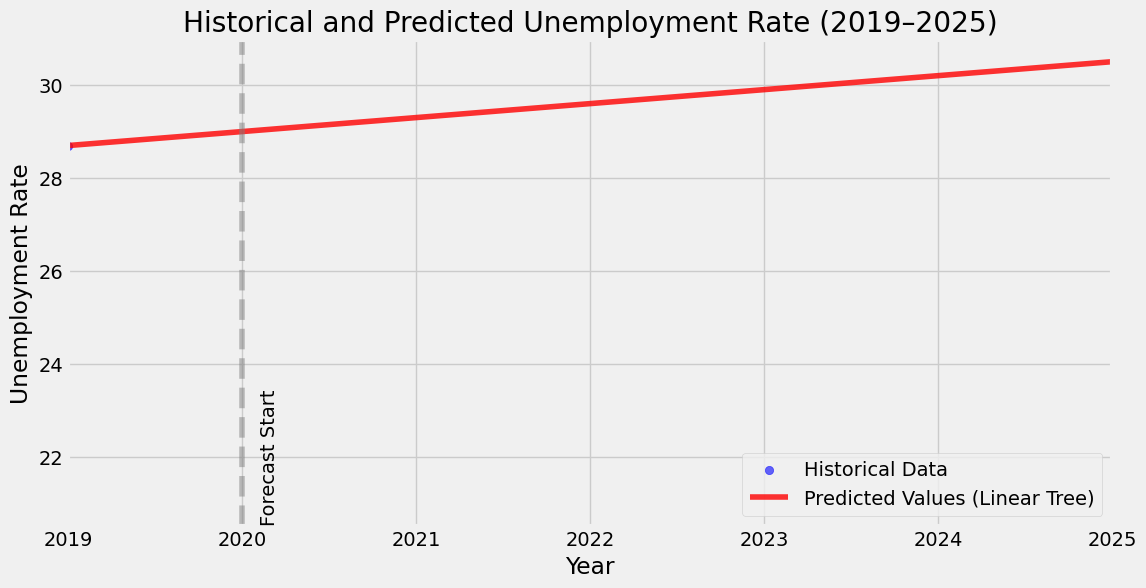


Predicted Unemployment Rate (2020–2025):
       Year  Predicted_Unemployment_Rate
0   2020.00                    29.000000
1   2020.25                    29.080000
2   2020.50                    29.150000
3   2020.75                    29.230000
4   2021.00                    29.299999
5   2021.25                    29.379999
6   2021.50                    29.450001
7   2021.75                    29.530001
8   2022.00                    29.600000
9   2022.25                    29.680000
10  2022.50                    29.750000
11  2022.75                    29.830000
12  2023.00                    29.900000
13  2023.25                    29.980000
14  2023.50                    30.049999
15  2023.75                    30.129999
16  2024.00                    30.200001
17  2024.25                    30.280001
18  2024.50                    30.350000
19  2024.75                    30.430000
20  2025.00                    30.500000

Processing Construction Growth


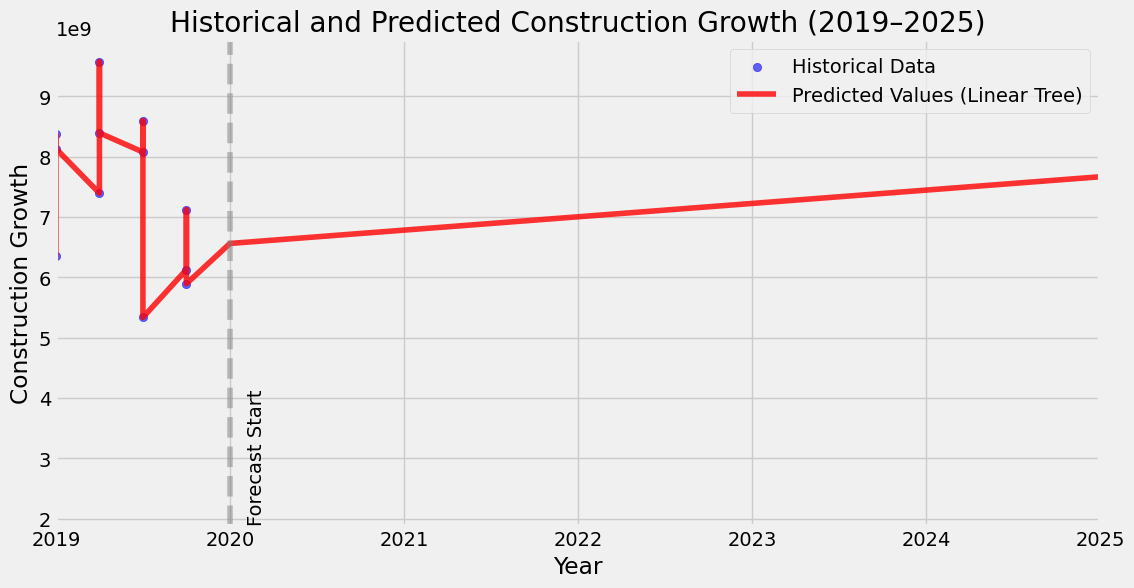


Predicted Construction Growth (2020–2025):
       Year  Predicted_Construction_Growth
0   2020.00                   6.562415e+09
1   2020.25                   6.617727e+09
2   2020.50                   6.673007e+09
3   2020.75                   6.728286e+09
4   2021.00                   6.783599e+09
5   2021.25                   6.838878e+09
6   2021.50                   6.894158e+09
7   2021.75                   6.949470e+09
8   2022.00                   7.004750e+09
9   2022.25                   7.060029e+09
10  2022.50                   7.115342e+09
11  2022.75                   7.170621e+09
12  2023.00                   7.225901e+09
13  2023.25                   7.281181e+09
14  2023.50                   7.336493e+09
15  2023.75                   7.391773e+09
16  2024.00                   7.447052e+09
17  2024.25                   7.502365e+09
18  2024.50                   7.557644e+09
19  2024.75                   7.612924e+09
20  2025.00                   7.668236e+09

Processin

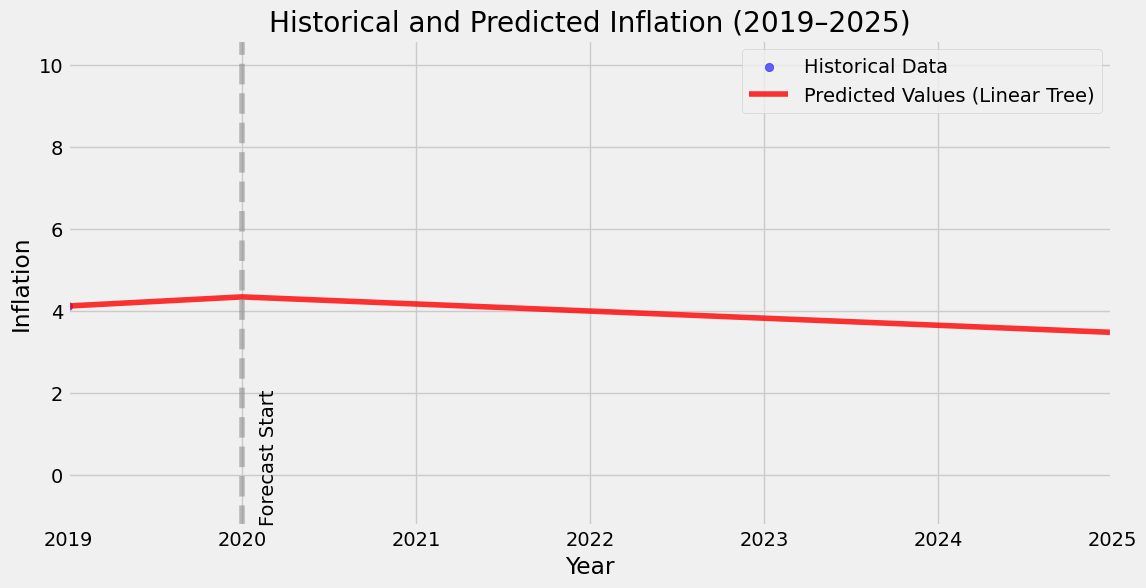


Predicted Inflation (2020–2025):
       Year  Predicted_Inflation
0   2020.00                 4.34
1   2020.25                 4.30
2   2020.50                 4.26
3   2020.75                 4.21
4   2021.00                 4.17
5   2021.25                 4.13
6   2021.50                 4.08
7   2021.75                 4.04
8   2022.00                 4.00
9   2022.25                 3.95
10  2022.50                 3.91
11  2022.75                 3.87
12  2023.00                 3.82
13  2023.25                 3.78
14  2023.50                 3.74
15  2023.75                 3.69
16  2024.00                 3.65
17  2024.25                 3.61
18  2024.50                 3.56
19  2024.75                 3.52
20  2025.00                 3.48

Processing Real GDP


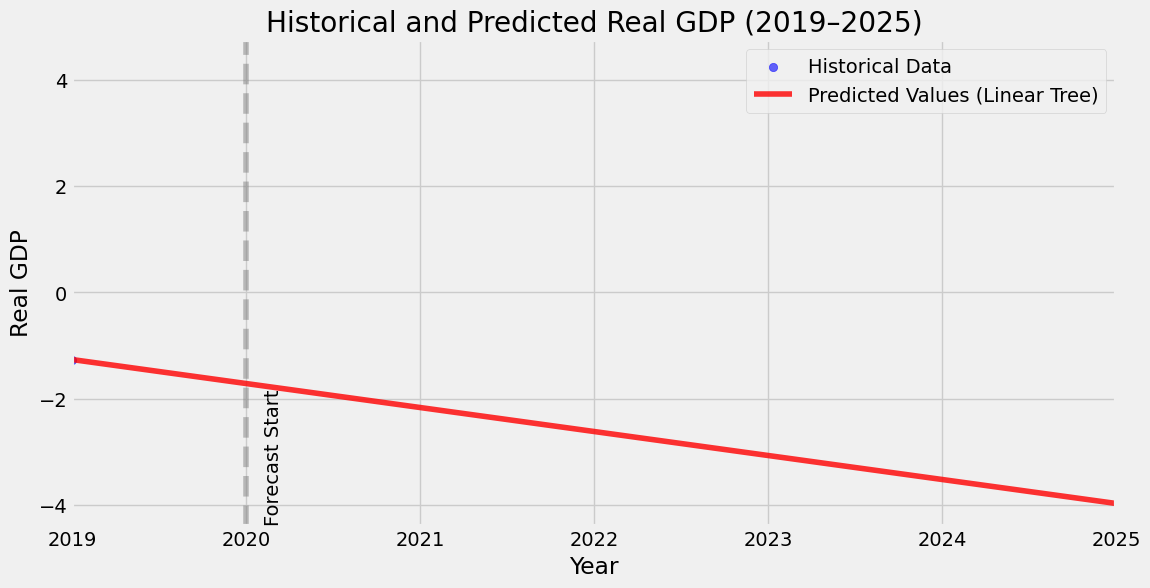


Predicted Real GDP (2020–2025):
       Year  Predicted_Real_GDP
0   2020.00               -1.71
1   2020.25               -1.83
2   2020.50               -1.94
3   2020.75               -2.05
4   2021.00               -2.17
5   2021.25               -2.28
6   2021.50               -2.39
7   2021.75               -2.50
8   2022.00               -2.62
9   2022.25               -2.73
10  2022.50               -2.84
11  2022.75               -2.96
12  2023.00               -3.07
13  2023.25               -3.18
14  2023.50               -3.29
15  2023.75               -3.41
16  2024.00               -3.52
17  2024.25               -3.63
18  2024.50               -3.75
19  2024.75               -3.86
20  2025.00               -3.97

Processing Nominal GDP


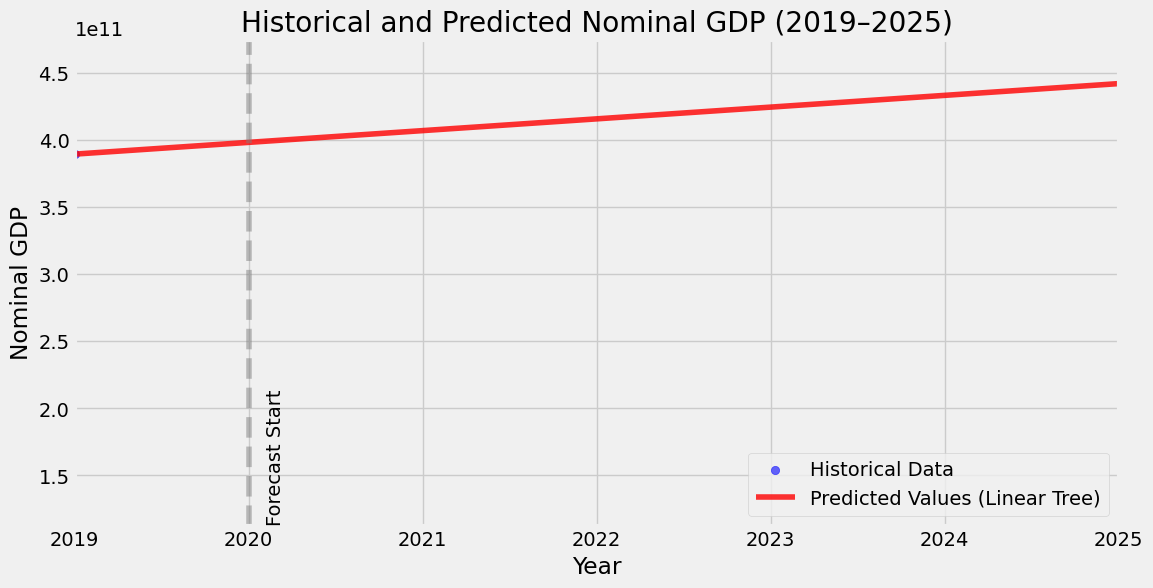


Predicted Nominal GDP (2020–2025):
       Year  Predicted_Nominal_GDP
0   2020.00           3.980845e+11
1   2020.25           4.002719e+11
2   2020.50           4.024613e+11
3   2020.75           4.046486e+11
4   2021.00           4.068381e+11
5   2021.25           4.090254e+11
6   2021.50           4.112148e+11
7   2021.75           4.134021e+11
8   2022.00           4.155916e+11
9   2022.25           4.177810e+11
10  2022.50           4.199683e+11
11  2022.75           4.221577e+11
12  2023.00           4.243451e+11
13  2023.25           4.265345e+11
14  2023.50           4.287218e+11
15  2023.75           4.309113e+11
16  2024.00           4.330986e+11
17  2024.25           4.352880e+11
18  2024.50           4.374774e+11
19  2024.75           4.396648e+11
20  2025.00           4.418542e+11


In [13]:
import numpy as np
import pandas as pd
from lineartree import LinearBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

def predict_future_linear_tree(data, target_col, title):
    # Handle NaN values using mean imputation
    imputer = SimpleImputer(strategy="mean")
    data[target_col] = imputer.fit_transform(data[[target_col]])
    
    # Extract features (Year) and target
    data['Year'] = data['Date'].dt.year + (data['Date'].dt.quarter - 1) / 4
    X = data[['Year']]
    y = data[target_col]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define and train the Linear Tree model
    linear_tree_model = LinearBoostRegressor(
        base_estimator=LinearRegression(),
        n_estimators=10,
        random_state=42
    )
    linear_tree_model.fit(X_train, y_train)
    
    # Predict for future years (2020–2025)
    future_years = np.arange(2020, 2025.25, 0.25)  # Quarterly data for 2020–2025
    future_X = pd.DataFrame({'Year': future_years})
    future_predictions = linear_tree_model.predict(future_X)
    
    # Append future predictions to the original data
    future_data = pd.DataFrame({
        'Year': future_years,
        f'Predicted_{target_col}': future_predictions
    })
    
    # Prepare historical data
    data['Predicted_Year'] = data['Year']
    data['Predicted_Value'] = data[target_col]
    
    # Combine historical and future data
    combined_data = pd.concat([
        data[['Predicted_Year', 'Predicted_Value']],
        future_data.rename(columns={
            'Year': 'Predicted_Year',
            f'Predicted_{target_col}': 'Predicted_Value'
        })
    ], ignore_index=True)
    
    # Plot historical and future predictions
    plt.figure(figsize=(12, 6))
    
    # Plot all historical data points but only show from 2019 onwards
    plt.scatter(data['Year'], data[target_col], 
               label="Historical Data", color="blue", alpha=0.6)
    plt.plot(combined_data['Predicted_Year'], combined_data['Predicted_Value'], 
            label="Predicted Values (Linear Tree)", color="red", alpha=0.8)
    
    # Add vertical line at 2020 to separate historical and predicted data
    plt.axvline(x=2020, color='gray', linestyle='--', alpha=0.5)
    plt.text(2020.1, plt.ylim()[0], 'Forecast Start', 
            rotation=90, verticalalignment='bottom')
    
    # Set x-axis limits to show only 2019-2025 without affecting the underlying data
    plt.xlim(2019, 2025)
    
    plt.title(f"Historical and Predicted {title} (2019–2025)")
    plt.xlabel("Year")
    plt.ylabel(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print future predictions
    print(f"\nPredicted {title} (2020–2025):")
    future_data[f'Predicted_{target_col}'] = future_data[f'Predicted_{target_col}'].round(2)
    print(future_data)
    
    return future_data

# Process each economic indicator
economic_indicators = {
    'Unemployment Rate': unemployment_rate,
    'Construction Growth': construction_growth,
    'Inflation': inflation,
    'Real GDP': real_gdp,
    'Nominal GDP': gdp_nominal
}

# Store all predictions
all_predictions = {}
for title, series in economic_indicators.items():
    print(f"\n{'='*50}")
    print(f"Processing {title}")
    print('='*50)
    
    # Convert series to DataFrame and call predict_future_linear_tree
    data = series.reset_index()
    data.columns = ['Date', title.replace(' ', '_')]
    predictions = predict_future_linear_tree(data, title.replace(' ', '_'), title)
    all_predictions[title] = predictions

## Identifying which economic indicators influence the unemployment rate the most.

**Feature Engineering**  will be used to identify the economic indicators that have the strongest influnece of unemployment rate.

A Random Forest Regressor will be used to predict unemployment rates based on  construction growth, inflation, Real GDP and Nominal GDP. It will calculate feature importance scores, which quantify how much each predictor contributes to reducing error in the model.



success
Random Forest Model Performance:
R² Score: -0.51
Mean Absolute Error: 0.56%

Feature Importance:
               Feature    Importance
2             Real GDP  6.762895e-01
1            Inflation  1.965056e-01
3          GDP Nominal  1.272049e-01
0  Construction Growth  9.389335e-15


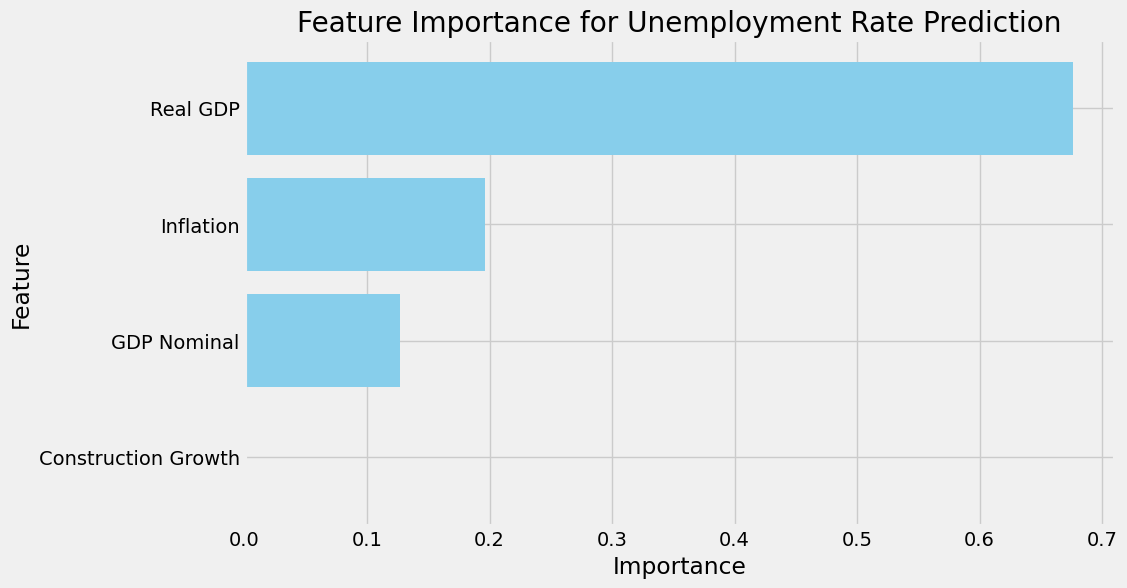

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt



def combineSet():
    # Unemployment rate (yearly)
    unemployment_rate = fred.get_series('LRUN64TTZAA156S', observation_start='2000-01-01', observation_end='2020-04-01')

    # Monthly series
    construction_growth = fred.get_series('ZAFPRCNTO01MLSAM', observation_start='2000-01-01', observation_end='2020-04-01')
#    manufacturing_growth = fred.get_series('ZAFPRMNTO01GYSAM', observation_start='2000-01-01', observation_end='2020-04-01')
#    mining_growth = fred.get_series('ZAFPIEAMI02GPM', observation_start='2000-01-01', observation_end='2020-04-01')
#    interest_rate = fred.get_series('INTDSRZAM193N', observation_start='2000-01-01', observation_end='2020-04-01')

    # Yearly series
    inflation = fred.get_series('FPCPITOTLZGZAF', observation_start='2000-01-01', observation_end='2020-04-01')
    real_gdp = fred.get_series('ZAFNGDPRPCPCPPPT', observation_start='2000-01-01', observation_end='2020-04-01')
    gdp_nominal = fred.get_series('MKTGDPZAA646NWDB', observation_start='2000-01-01', observation_end='2020-04-01')

    # Resample monthly series to yearly averages
    construction_growth = construction_growth.resample('Y').mean()
#    manufacturing_growth = manufacturing_growth.resample('Y').mean()
#    mining_growth = mining_growth.resample('Y').mean()
#    interest_rate = interest_rate.resample('Y').mean()

    # Combine into a single DataFrame
    aligned_data = pd.concat(
        [unemployment_rate, construction_growth, inflation, real_gdp, gdp_nominal],
        axis=1,
        join='outer'  # Ensure all data is included
    )
    aligned_data.columns = [
        'Unemployment', 'Construction Growth', 'Inflation', 'Real GDP', 'GDP Nominal'
    ]

    # Handle missing values with mean imputation
    aligned_data = aligned_data.fillna(aligned_data.mean())

    return aligned_data.reset_index()


# Combine datasets
try:
    data = combineSet()
    print("success")
#    print(data)
#    print(f"Data shape: {data.shape}")
except ValueError as e:
    print("ValueError:", e)

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
data.iloc[:, 1:] = pd.DataFrame(
    imputer.fit_transform(data.iloc[:, 1:]),
    columns=data.columns[1:],
    index=data.index
)

# Features (X) and target (y)
X = data.drop(columns=['index', 'Unemployment'])
y = data['Unemployment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict unemployment rates on the test set
y_pred = rf.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Random Forest Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}%")

# Feature importance
importances = rf.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Unemployment Rate Prediction')
plt.gca().invert_yaxis()
plt.show()